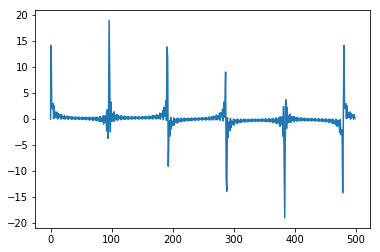

In [2]:
#a noisey signal:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cmath

class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega
		return self.volume * np.imag(self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()
		elif self.type == "triangle":
			return self.triangleGen()

#fft needs a power of 2
windowSize = 48000
        
test_sample = np.zeros(windowSize)

#how many hz between added samples
gap = 500
maxFreq = 20000
minFreq = 100

currFreq = minFreq

while currFreq <= maxFreq:
    osc = waveGen(currFreq, windowSize, 'sine', .5)
    test_sample += osc.nextFrame()
    currFreq += gap

#show plots of time domain
plt.plot(test_sample[:500])
plt.show()

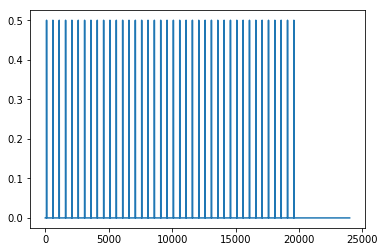

In [3]:
#And plot time domain

test_FreqSpec = np.fft.fft(test_sample)

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), windowSize//2)

#ploting the graph
plt.plot(xf, 2.0/windowSize * np.abs(test_FreqSpec[:windowSize//2]))
plt.show()

In [4]:
#the equasion:

#Y[n] = sumToM-UsingK(b[k] * x[n-k])

class FirFilt:
    def __init__(self, BVals, MLen):
        self.M = MLen
        self.B = BVals
    
    def proccess(self, signal):
        
        Y = np.zeros(len(signal))
        for n in range(self.M, len(signal)):
            for k in range(self.M):
                Y[n] += self.B[k] * signal[n-k]
                
        return Y
                
                    
        


## To find the beta vals (impulse responce) we can do an ifft of the freq responce

### i will use a hanning window as the freq responce


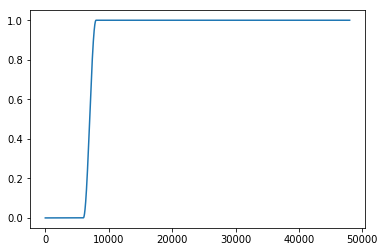

In [10]:
#hanning = 5 * (np.append(1 - np.hanning(4000), np.full(windowSize - 4000, 1)))

#hanning = (np.hanning(2000))
#hanning = np.append(np.append(np.full(2000, 1), hanning), np.full(20000, 1))
#hanning = np.append(hanning, np.full(windowSize//4 - 5000, 0))
CO_S = 5000
tot_size = 12000

#hanning = np.append([np.full(5000, 0), np.hanning(5000)], [np.full(24000, 0), np.full(24000, 0)])
hanning = np.concatenate([np.full(6000, 0), np.hanning(4000)[:2000], np.full(48000 - 8000, 1)])
plt.plot(hanning)
plt.show()

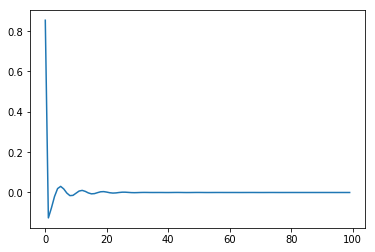

In [11]:
impulse_responce = np.fft.ifft(hanning)
plt.plot(impulse_responce[:100])
plt.show()

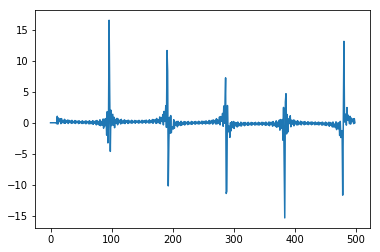

48000


In [12]:
m = 10
beta = impulse_responce[:m]

filt = FirFilt(np.real(beta), m)

output = filt.proccess(np.real(test_sample))

plt.plot(output[:500])

plt.show()

print(len(output))

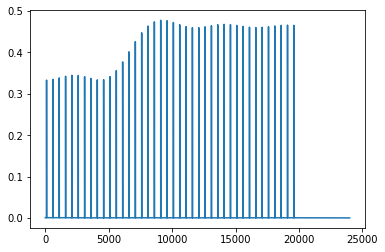

In [13]:
#And plot time domain

out_FreqSpec = np.fft.fft(output)

#linespaceing
T = 1.0 / 48000.0

#x angle of plot
xf = np.linspace(0.0, 1.0/(2.0*T), windowSize//2)

#ploting the graph
plt.plot(xf, 2.0/windowSize * np.abs(out_FreqSpec[:windowSize//2]))
plt.show()

### In playing around with this i am able to gain some control over the output,

I have been able to create band pass, band stop, low pass and high pass

though this has been difficult and inpresise

im not sure if there is a thing going on with reflections in the windowing filter after the ifft.

is there aliasting in the window?????

